# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
df = pd.read_csv("../data/states_edu.csv")
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [3]:
df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1715.000000,1.224000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.224000e+03,...,1632.000000,1632.000000,1632.000000,1.020000e+03,1.071000e+03,1.632000e+03,565.000000,602.000000,650.000000,562.000000
mean,2002.075219,9.175416e+05,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,4.299509e+05,...,69166.507966,68106.537377,58420.870711,5.779547e+05,2.820691e+05,9.139695e+05,236.327434,278.280731,218.806154,263.558719
std,9.568621,1.066514e+06,1.175962e+07,1.146992e+06,5.549735e+06,5.489562e+06,1.199279e+07,6.300569e+06,3.357214e+06,5.347893e+05,...,79957.990356,77965.847263,67438.530709,6.757837e+05,3.307098e+05,1.055893e+06,9.285505,10.343482,7.681805,6.612601
min,1986.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,4577.000000,3371.000000,2572.000000,3.769800e+04,1.353000e+04,6.844900e+04,192.000000,231.000000,179.000000,236.000000
25%,1994.000000,2.645145e+05,2.189504e+06,1.899575e+05,1.165776e+06,7.151210e+05,2.170404e+06,1.171336e+06,6.380760e+05,1.034492e+05,...,18971.500000,19594.250000,16076.500000,1.649250e+05,8.060800e+04,2.480832e+05,232.000000,272.000000,215.000000,260.000000
50%,2002.000000,6.499335e+05,5.085826e+06,4.035480e+05,2.537754e+06,2.058996e+06,5.242672e+06,2.658253e+06,1.525471e+06,2.717040e+05,...,49087.000000,47880.000000,39408.000000,4.051115e+05,1.869190e+05,6.458050e+05,238.000000,280.500000,220.000000,265.000000
75%,2010.000000,1.010532e+06,1.084516e+07,8.279320e+05,5.055548e+06,4.755293e+06,1.074420e+07,5.561959e+06,3.222924e+06,5.172222e+05,...,78504.250000,78976.000000,69397.250000,6.439752e+05,3.223280e+05,1.043420e+06,242.000000,286.000000,224.000000,268.000000
max,2019.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,6.441557e+06,253.000000,301.000000,237.000000,280.000000


In [4]:
df.isna().sum() # checking for Nan values in every column

PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL                           491
TOTAL_REVENUE                    440
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
INSTRUCTION_EXPENDITURE          440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
GRADES_PK_G                      173
GRADES_KG_G                       83
GRADES_4_G                        83
GRADES_8_G                        83
GRADES_12_G                       83
GRADES_1_8_G                     695
GRADES_9_12_G                    644
GRADES_ALL_G                      83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *AVG_MATH_4_SCORE*

<AxesSubplot: title={'center': 'Distribution of 4th Grade Maths Scores'}, ylabel='Frequency'>

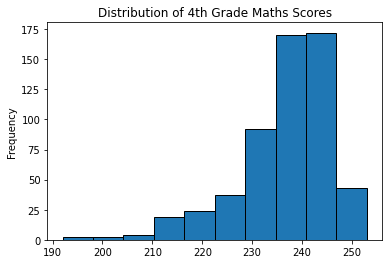

In [5]:
df.AVG_MATH_4_SCORE.plot.hist(title="Distribution of 4th Grade Maths Scores", edgecolor="black")

<AxesSubplot: title={'center': 'Distribution of 8th Grade Maths Scores'}, ylabel='Frequency'>

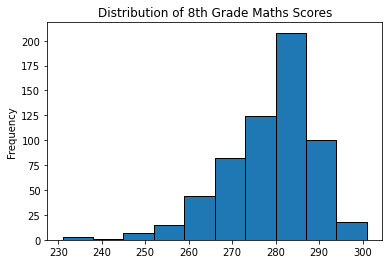

In [6]:
df.AVG_MATH_8_SCORE.plot.hist(title="Distribution of 8th Grade Maths Scores", edgecolor="black")

<AxesSubplot: title={'center': 'Distribution of 8th Grade Reading Scores'}, ylabel='Frequency'>

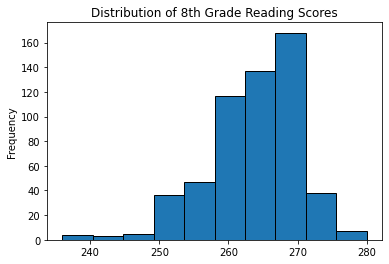

In [7]:
df.AVG_READING_8_SCORE.plot.hist(title="Distribution of 8th Grade Reading Scores", edgecolor="black")

<AxesSubplot: title={'center': 'Distribution of 4th Grade READING Scores'}, ylabel='Frequency'>

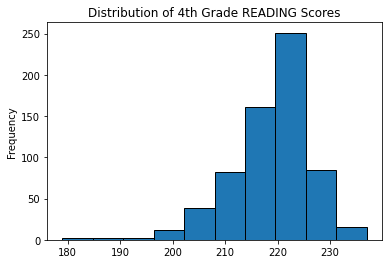

In [8]:
df.AVG_READING_4_SCORE.plot.hist(title="Distribution of 4th Grade READING Scores", edgecolor="black")

How many years of data are logged in our dataset? 

In [9]:
df.YEAR.nunique()

33

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

Text(0.5, 1.0, '4th Grade Reading Score Over Time')

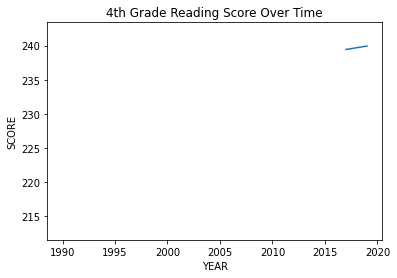

In [10]:
df.groupby('YEAR')["AVG_MATH_4_SCORE"].mean().plot()
plt.ylabel('SCORE')
plt.title('4th Grade Reading Score Over Time')

In [11]:
# Selecting AVG_MATH_4_SCORE as Outcome Variable
x = df.groupby(['STATE'])
s_avg = pd.Series(x.AVG_MATH_4_SCORE.mean()) # calculating avg across all years in each state
s_avg.loc['MICHIGAN'] > s_avg.loc['OHIO'] # comparing MICHIGAN score to OHIO Score


False

Ohio has higher average outcome score across all years

Find the average for your outcome score across all states in 2019

Text(0.5, 1.0, '4th Grade Math Score Over Time')

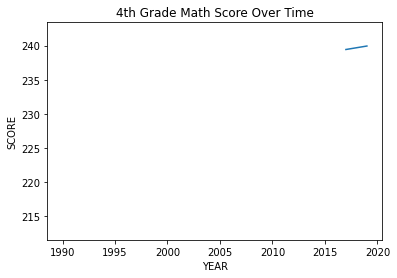

In [12]:
df.groupby('YEAR')["AVG_MATH_4_SCORE"].mean().plot()
plt.ylabel('SCORE')
plt.title('4th Grade Math Score Over Time')

In [13]:
df[df.YEAR == 2019].set_index('STATE')['AVG_MATH_4_SCORE']

STATE
ALABAMA                 230.0
ALASKA                  232.0
ARIZONA                 238.0
ARKANSAS                233.0
CALIFORNIA              235.0
COLORADO                242.0
CONNECTICUT             243.0
DELAWARE                239.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 238.0
HAWAII                  239.0
IDAHO                   242.0
ILLINOIS                237.0
INDIANA                 245.0
IOWA                    241.0
KANSAS                  239.0
KENTUCKY                239.0
LOUISIANA               231.0
MAINE                   241.0
MARYLAND                239.0
MASSACHUSETTS           247.0
MICHIGAN                236.0
MINNESOTA               248.0
MISSISSIPPI             241.0
MISSOURI                238.0
MONTANA                 241.0
NATIONAL                241.0
NEBRASKA                244.0
NEVADA                  236.0
NEW_HAMPSHIRE           245.0
NEW_JERSEY              246.0
NEW_

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [14]:
x.AVG_MATH_4_SCORE.max() #groupby STATE then getting max AVG SCORE out of all years

STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

In [15]:
#From above histograms we saw that all scores are left-skewed. Hence using median to impute all those scores.
#fillna(y.mean(), inplace=True)
df[['AVG_MATH_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE']] = df[['AVG_MATH_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE']].fillna(df[['AVG_MATH_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE']].median())

df[['AVG_MATH_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE']].isna().sum()

AVG_MATH_4_SCORE       0
AVG_MATH_8_SCORE       0
AVG_READING_4_SCORE    0
AVG_READING_8_SCORE    0
dtype: int64

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [16]:
df['INSTRUCTION_EXP_PER_STUDENT'] = df["INSTRUCTION_EXPENDITURE"] / df['GRADES_ALL_G']
df['SUPPORT_EXP_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE']/df['GRADES_ALL_G']

df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,INSTRUCTION_EXP_PER_STUDENT,SUPPORT_EXP_PER_STUDENT
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,265.0,2.025197,1.004650
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,6714.0,NaN,NaN,122487.0,238.0,280.5,220.0,265.0,4.068693,2.864810
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,265.0,2.132082,1.496312
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,265.0,2.184247,1.095128
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,265.0,2.732512,1.621537


Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

I created INSTRUCTION_EXP_PER_STUDENT and SUPPORT_EXP_PER_STUDENT as I belive that money spend on Instruction and Support toward Students will correlate more with the avg outcome scores.
As, I dont have detail about every Column. Hence I have not taken into account OTHER_EXPENDITURE and CAPITAL_OUTLAY_EXPENDITURE  
to create per student expenditure.



<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

In [17]:
df.isna().sum()


PRIMARY_KEY                       0
STATE                             0
YEAR                              0
ENROLL                          491
TOTAL_REVENUE                   440
FEDERAL_REVENUE                 440
STATE_REVENUE                   440
LOCAL_REVENUE                   440
TOTAL_EXPENDITURE               440
INSTRUCTION_EXPENDITURE         440
SUPPORT_SERVICES_EXPENDITURE    440
OTHER_EXPENDITURE               491
CAPITAL_OUTLAY_EXPENDITURE      440
GRADES_PK_G                     173
GRADES_KG_G                      83
GRADES_4_G                       83
GRADES_8_G                       83
GRADES_12_G                      83
GRADES_1_8_G                    695
GRADES_9_12_G                   644
GRADES_ALL_G                     83
AVG_MATH_4_SCORE                  0
AVG_MATH_8_SCORE                  0
AVG_READING_4_SCORE               0
AVG_READING_8_SCORE               0
INSTRUCTION_EXP_PER_STUDENT     440
SUPPORT_EXP_PER_STUDENT         440
dtype: int64

Text(0, 0.5, '4th Grade Math Score')

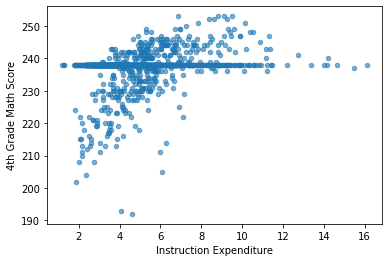

In [18]:
df.plot.scatter(x='INSTRUCTION_EXP_PER_STUDENT', y='AVG_MATH_4_SCORE', alpha=0.6)
plt.xlabel('Instruction Expenditure')
plt.ylabel('4th Grade Math Score')

**Realtion between Instruction Expenditure and 4th Grade Math Score**

**Visualization 2**

Text(0, 0.5, '4th Grade Math Score')

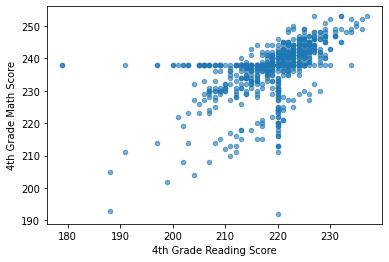

In [19]:
df.plot.scatter(x='AVG_READING_4_SCORE', y='AVG_MATH_4_SCORE', alpha=0.6)
plt.xlabel('4th Grade Reading Score')
plt.ylabel('4th Grade Math Score')

**Relation between Grade 4 Reading and Math Score**

Text(0, 0.5, '4th Grade Math Score')

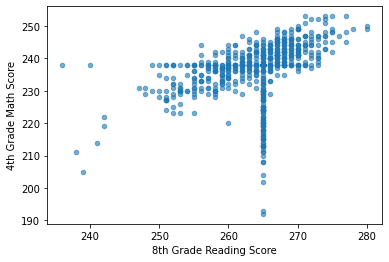

In [20]:
df.plot.scatter(x='AVG_READING_8_SCORE', y='AVG_MATH_4_SCORE', alpha=0.6)
plt.xlabel('8th Grade Reading Score')
plt.ylabel('4th Grade Math Score')

**Relation between Grade 8 Reading and Grade 4 Math**

Text(0, 0.5, '4th Grade Math Score')

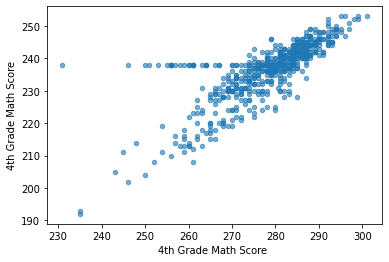

In [21]:
df.plot.scatter(x='AVG_MATH_8_SCORE', y='AVG_MATH_4_SCORE', alpha=0.6)
plt.xlabel('4th Grade Math Score ')
plt.ylabel('4th Grade Math Score')

**Relation between Grade 8 Math and Grade 4 Math**

Text(0, 0.5, '4th Grade Math Score')

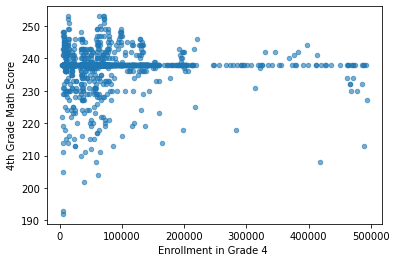

In [22]:
df.plot.scatter(x='GRADES_4_G', y='AVG_MATH_4_SCORE', alpha=0.6)
plt.xlabel('Enrollment in Grade 4 ')
plt.ylabel('4th Grade Math Score')

**Relation between Enrollment in Grade 4 and Grade 4 Math Score**

Text(0, 0.5, '4th Grade Math Score')

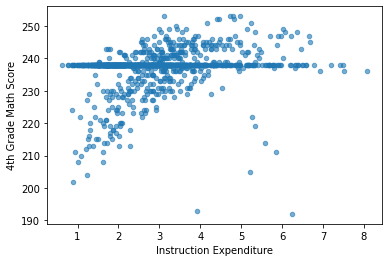

In [23]:
df.plot.scatter(x='SUPPORT_EXP_PER_STUDENT', y='AVG_MATH_4_SCORE', alpha=0.6)
plt.xlabel('Instruction Expenditure')
plt.ylabel('4th Grade Math Score')

**Realtion between Instruction Expenditure and 4th Grade Math Score**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [24]:
from sklearn.model_selection import train_test_split

From EDA we can see that there is high correlation between 'AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE' with outcome hence taking them into train data

Also taking GRADES_4_G as enrollment will also effect AVG_Score but it is not highly correlated. 

In [25]:
X = df[['GRADES_4_G','AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE']].dropna()
y = df.loc[X.index]['AVG_MATH_4_SCORE']


In [26]:
X.shape

(1632, 4)

In [27]:
 X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.2, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [28]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [29]:
# create your model here
model = LinearRegression()

In [30]:
model.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [32]:
from sklearn.metrics import mean_squared_error,r2_score


In [33]:
mean_squared_error(y_test,y_pred)

11.344651785589406

In [34]:
r2_score(y_test,y_pred)

0.6014803578048725

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

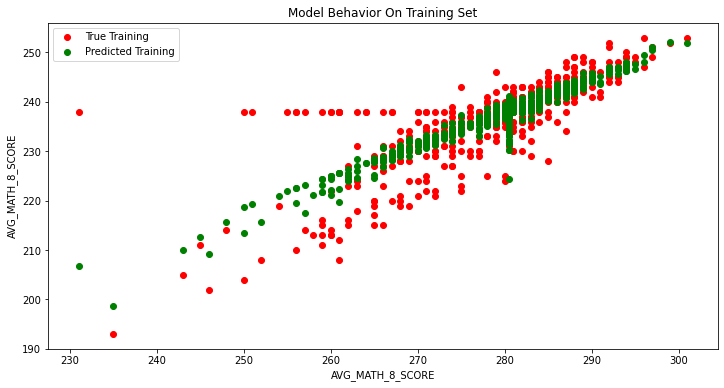

In [35]:
col_name = 'AVG_MATH_8_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_8_SCORE')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

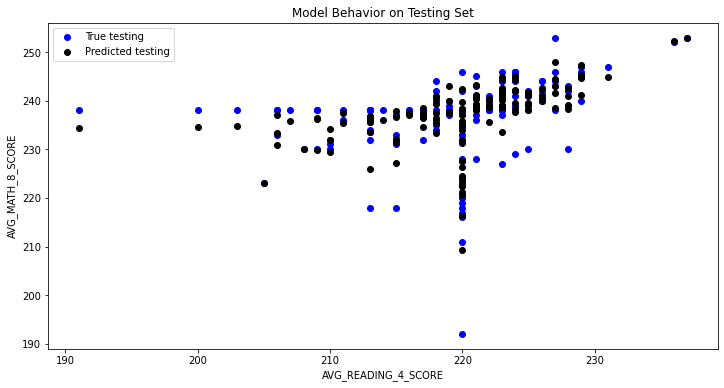

In [36]:
col_name = 'AVG_READING_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_8_SCORE')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**I Started with getting familiar with the dataset. What it is providing and what data it is representing. Then I checked how much data is missing in each column.
In EDA, I plotted the data for few main columns and checked the distribution type of each colum. Which in turn helped in imputting the data later in missing column as data was left skewed, I selected median over mean to impute data. There, I observed that AVG_MATHS_4_SCORE increased over time. For data imputation rather than mean, meadian,mode imputation, we can use KNN imputation and MICE imputation also. 
I created INSTRUCTION_EXP_PER_STUDENT and SUPPORT_EXP_PER_STUDENT as I belive that money spend on Instruction and Support toward Students will correlate more with the avg outcome scores.
As, I dont have detail about every Column. Hence I have not taken into account OTHER_EXPENDITURE and CAPITAL_OUTLAY_EXPENDITURE  
to create per student expenditure.
In visualization, I observed that Math score for grade 4 were more closely related with reading scores of both grade 4 and 8 and math score of grade 8. They were loosely correlated with the expenditure. 
Therefore, for prediction part, I choose Enrollment and Grade 8 math and Reading score and Grade 4 reading score as training feature as they were highly correlated with the outcome variable. The model performed quite good but it can be further improved by using other machine learning methods or hyperparameter optimization.**

